In [62]:
import os
import pandas as pd
import numpy as np
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## Setting seed for reproducability
np.random.seed(42)

In [11]:
## Data importing


def merge_data(data1_path, data2_path, data_path):
    if not os.path.exists(data_path):
        col_names = ['age', 'work', 'fin', 'educ', 'educ_num', 'marit', 'occup', \
                        'relat', 'race', 'sex', 'cap_gain', 'cap_loss', \
                        'hours', 'native', 'wage']
        data1 = pd.read_table(data1_path, sep=',', names=col_names, index_col=False)
        data2 = pd.read_table(data2_path, sep=',', names=col_names, index_col=False)
        data2 = data2[1:]
        data = pd.concat([data1, data2], axis=0)
        #data.to_csv(data_path)
        
    data = pd.read_csv(data_path)
    data = data.drop(['Unnamed: 0'], axis=1)
    return data

income = merge_data(data1_path='adult.csv', data2_path='adult_test.csv', data_path='income.csv')
income = income.sample(frac=1)
income.reset_index(inplace=True, drop=True)
income = income[['age', 'fin', 'educ_num', 'cap_gain', 'cap_loss', 'hours', 'wage']]
income = income.dropna()
income['wage'] = income['wage'].map(lambda x: 1. if x.strip().replace('.','')=='>50K' else -1.)
income.head()


x = income.drop(['wage'], axis = 1)
y = income['wage']
x = x.values
y = y.values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

## Scaling
x_train = sklearn.preprocessing.scale(x_train)
x_test = sklearn.preprocessing.scale(x_test)


In [119]:
## Function definitions

def unit_hinge_loss(gamma_i,yi):
    '''
    Calculates the Hinge Loss for a single observation
    '''
    return(max(0, 1-gamma_i*yi))


def hinge_loss(x,y,a,b, lam=0.001):
    '''
    Given data (x,y) and parameters (a,b,lam) this function returns a list of three elements:
    > The total hinge loss over the data
    > The gradient of the hinge loss over the data for a
    > The gradient of the hinge loss over the data for b
    
    '''
    ### Initializing the elements
    total_loss = 0
    total_grad_a = np.zeros(shape=(x.shape[1], ))
    total_grad_b = 0.
    N = x.shape[0]
    
    ### Iterating over the rows of the data and adding to the total gradients and total loss
    for idx in range(N):
        xi = x[idx, ]
        yi = y[idx]
        gamma_i = np.dot(xi, a) + b
        
        total_loss += unit_hinge_loss(gamma_i=gamma_i,yi=yi)
        
        if (yi*gamma_i >=1.):
            total_grad_a += np.zeros(a.shape[0])
            total_grad_b += 0.
        else:
            total_grad_a -= yi * xi  # check it
            total_grad_b -= yi       # check it
    
    ## Averaging the gradients and loss
    grad_a = total_grad_a/N
    grad_b = total_grad_b/N
    grad_a += lam*(np.matmul(a.T, a)/2)
    
    total_loss /= N
    
    return total_loss, grad_a, grad_b


def gradient_descent(x, y, a, b, lam = 0.5, loss_function=hinge_loss, max_steps=300, 
                     eta = 0.001, verbose = True, return_acc = False):
    '''
    Given data (x,y), parameters (a,b,lam), a loss function, # of training epochs (max_steps), and a
    learning rate (eta) this function returns a list of two elements:
    > The final a value reached after max_epochs of training
    > The final b value reached after max_epochs of training
    '''
    x_, y_, x_val, y_val = get_batch(x, y)
    
    for step in range(1,max_steps):
        smallest_loss = np.inf
        eta = 1./ (0.01*step + 50.)
        loss, grad_a, grad_b = loss_function(x=x_,y=y_,a=a,b=b,lam=lam)
        if verbose and step%100==0:
            print("Step=" + str(step) + " , Loss=" + str(np.round(loss,2)))
        if loss<smallest_loss:
            a = a - eta*grad_a
            b = b - eta*grad_b
            smallest_loss = loss
    
    gamma = np.matmul(x_val,a) + b
    pred = np.sign(gamma)
    acc = np.float(sum(pred==y_val)) / len(y)
    if verbose:
        print ('Validation Accuracy: ' + str(acc))
    if return_acc:
        return a,b, acc
    else:
        return a,b

def fit(x, y,  steps=300, verbose=True, epochs = 10, lam=0.01):
    a = np.random.rand((x.shape[1])) - 0.5 
    b = 0.
    acc_list = []
    
    
    for epoch in range(1,epochs):
        total_steps = 0
        print("Epoch -- " + str(epoch))    

        
        while(total_steps<300):
            a, b, acc = gradient_descent(x=x, y=y, a=a, b=b, max_steps=30, verbose=verbose, return_acc=True,lam=lam)
            acc_list.append(acc)
            total_steps += 30
            
    return a,b,acc_list


def get_batch(x, y):
    x_val, x_batch, y_val, y_batch = train_test_split(x,y, test_size = 0.10)
    return x_batch, y_batch, x_val, y_val

In [123]:
lambda_accuracies = []
lambda_vals = [1e-3, 1e-2, 1e-1, 1]
for lambda_val in lambda_vals:
    a_final, b_final, accuracies = fit(x_train, y_train, epochs=50,verbose=False, lam=lambda_val)
    lambda_accuracies.append(accuracies)

Epoch -- 1
Epoch -- 2
Epoch -- 3
Epoch -- 4
Epoch -- 5
Epoch -- 6
Epoch -- 7
Epoch -- 8
Epoch -- 9
Epoch -- 10
Epoch -- 11
Epoch -- 12
Epoch -- 13
Epoch -- 14
Epoch -- 15
Epoch -- 16
Epoch -- 17
Epoch -- 18
Epoch -- 19
Epoch -- 20
Epoch -- 21
Epoch -- 22
Epoch -- 23
Epoch -- 24
Epoch -- 25
Epoch -- 26
Epoch -- 27
Epoch -- 28
Epoch -- 29
Epoch -- 30
Epoch -- 31
Epoch -- 32
Epoch -- 33
Epoch -- 34
Epoch -- 35
Epoch -- 36
Epoch -- 37
Epoch -- 38
Epoch -- 39
Epoch -- 40
Epoch -- 41
Epoch -- 42
Epoch -- 43
Epoch -- 44
Epoch -- 45
Epoch -- 46
Epoch -- 47
Epoch -- 48
Epoch -- 49
Epoch -- 1
Epoch -- 2
Epoch -- 3
Epoch -- 4
Epoch -- 5
Epoch -- 6
Epoch -- 7
Epoch -- 8
Epoch -- 9
Epoch -- 10
Epoch -- 11
Epoch -- 12
Epoch -- 13
Epoch -- 14
Epoch -- 15
Epoch -- 16
Epoch -- 17
Epoch -- 18
Epoch -- 19
Epoch -- 20
Epoch -- 21
Epoch -- 22
Epoch -- 23
Epoch -- 24
Epoch -- 25
Epoch -- 26
Epoch -- 27
Epoch -- 28
Epoch -- 29
Epoch -- 30
Epoch -- 31
Epoch -- 32
Epoch -- 33
Epoch -- 34
Epoch -- 35
Epoch -- 3

Best accuracy with lambda = 1e-3: 0.7312600950929318
Best accuracy with lambda = 1e-2: 0.7333757990763701
Best accuracy with lambda = 1e-1: 0.7140387196578475
Best accuracy with lambda = 1: 0.6927224332870761


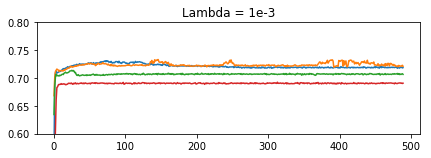

In [124]:

print("Best accuracy with lambda = 1e-3: " + str(np.max(lambda_accuracies[0])))
print("Best accuracy with lambda = 1e-2: " + str(np.max(lambda_accuracies[1])))
print("Best accuracy with lambda = 1e-1: " + str(np.max(lambda_accuracies[2])))
print("Best accuracy with lambda = 1: " + str(np.max(lambda_accuracies[3])))


plt.figure(1)

plt.subplot(211)
plt.title("Lambda = 1e-3")
plt.ylim((0.6,0.8))
plt.plot(lambda_accuracies[0])
plt.plot(lambda_accuracies[1])
plt.plot(lambda_accuracies[2])
plt.plot(lambda_accuracies[3])



plt.tight_layout()


plt.show()

In [126]:
a_final, b_final, accuracies = fit(x_train, y_train, epochs=50,verbose=False, lam=0.001)
test_gamma = np.matmul(x_test, a_final) + b_final
test_gamma = np.sign(test_gamma)
np.mean(test_gamma==y_test)

Epoch -- 1
Epoch -- 2
Epoch -- 3
Epoch -- 4
Epoch -- 5
Epoch -- 6
Epoch -- 7
Epoch -- 8
Epoch -- 9
Epoch -- 10
Epoch -- 11
Epoch -- 12
Epoch -- 13
Epoch -- 14
Epoch -- 15
Epoch -- 16
Epoch -- 17
Epoch -- 18
Epoch -- 19
Epoch -- 20
Epoch -- 21
Epoch -- 22
Epoch -- 23
Epoch -- 24
Epoch -- 25
Epoch -- 26
Epoch -- 27
Epoch -- 28
Epoch -- 29
Epoch -- 30
Epoch -- 31
Epoch -- 32
Epoch -- 33
Epoch -- 34
Epoch -- 35
Epoch -- 36
Epoch -- 37
Epoch -- 38
Epoch -- 39
Epoch -- 40
Epoch -- 41
Epoch -- 42
Epoch -- 43
Epoch -- 44
Epoch -- 45
Epoch -- 46
Epoch -- 47
Epoch -- 48
Epoch -- 49


0.7967246673490276

In [58]:
a_final

array([ 6.21660275e-04, -1.08876094e-03,  1.25370668e-03,  4.43034765e-01,
       -3.39068364e-04,  4.20873414e-04])

In [60]:
b_final

-0.934037807764959

In [108]:
len(lambda_accuracies)

4